# Demonstration of orienteering algorithm

Author: Filipp Peresadilo

Date: 25-06-2024

This is the demo of the code in the [drone_pathfinding project](https://github.com/fperesadilo/drone_pathfinder). In this project, I develop a simulation in which a drone independently monitors an area. The drone navigates a grid to find the most optimal path that maximizes the total sum of collected values, considering a dynamic nature of cell values (regeneration of value after node visit). This notebook presents a demonstration of two algorithms of solving this orienteering problem: an approach using (1) dynamic programming, and (2) a genetic algorithm. Dynamic programming was selected for its efficiency in finding optimal solutions in smaller to medium-sized grids within feasible time limits. It systematically breaks down the problem into subproblems and stores intermediate results. A genetic algorithm was chosen as a metaheuristic approach capable of handling larger search spaces and longer time horizons where exact methods like DP might become impractical due to computational and memory constraints.

## Imports

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Proprietary algorithm
from orienteering import DynamicProgramming, GeneticAlgorithm
from utils import parse_grid, visualize_path
from starting_points import starting_points_1000

# Parse grids from provided txt files
grid_20 = parse_grid('grids/20.txt')
grid_100 = parse_grid('grids/100.txt')
grid_1000 = parse_grid('grids/1000.txt')

## Visual demonstration

### Dynamic Programming

The dynamic programming algorithm for path planning in a grid with changing cell values works like a methodical treasure hunt. Imagine starting at a point on a map where each spot has a different value. The goal is simple: find a path that, over a set number of moves, collects the most value possible.

To achieve this, the algorithm uses a table that keeps track of the best possible value for reaching each spot on the map at each step of the journey. As it progresses through each step, it updates this table to ensure it always knows the best way to maximize the total value collected up to that point.

The algorithm also considers the cost of revisiting spots where values might change over time. It carefully evaluates each move—whether to revisit a known spot or explore new ones—ensuring it makes the best decisions based on the potential rewards at each step.

Overall, the algorithm combines systematic exploration with smart decision-making to find a path that not only respects time limits but also gathers the highest possible total value. It's like navigating a map to gather as much treasure as possible, using a step-by-step approach to ensure every move counts towards maximizing the loot.

Max Value: 48
Path: [(10, 10), (10, 11), (9, 11), (8, 10), (9, 9), (8, 8), (7, 9), (6, 9), (5, 9), (6, 10), (5, 11), (4, 11), (3, 12), (3, 13), (4, 13), (4, 12), (5, 12), (6, 12), (7, 13), (8, 14), (9, 14), (9, 13), (9, 12), (10, 11), (11, 10), (10, 10)]


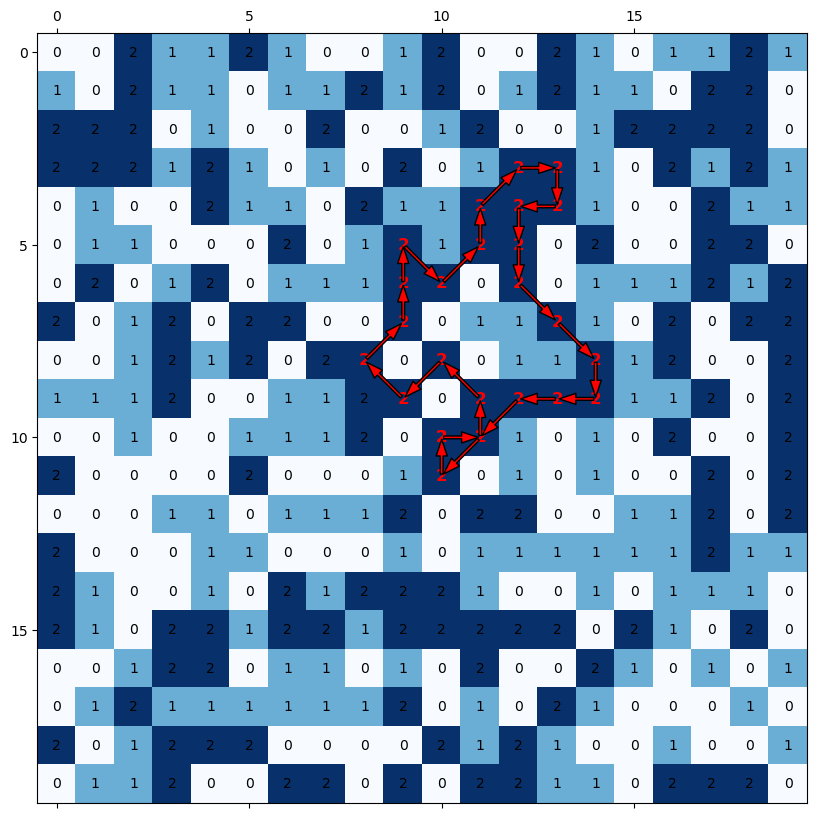

In [2]:
# Initialize input parameters
start = (10, 10)
T = 25
regen_value = 0

# Create an instance of DP implementation and calculate the maximum path value and path
path_finder = DynamicProgramming(grid_20, start, T, regen_value)
max_value, path, dp, parent, running_time_ms = path_finder.max_path_value_and_path()

# Print the results
print("Max Value:", max_value)
print("Path:", path)
visualize_path(grid_20, path)

### Genetic Algorithm

The genetic algorithm for path planning in a grid with changing cell values operates very much like evolutionary principles in nature. In this algorithm, multiple potential paths (represented as chromosomes) are generated randomly. Each path's fitness, or how well it collects values, is evaluated. Like natural selection, paths with higher fitness are more likely to "survive" and influence future generations of paths.

Through a process resembling genetic crossover and mutation, better-performing paths are combined and altered over successive generations to explore new potential paths. This mimics how genetic traits combine and mutate in living organisms, fostering diversity and potentially uncovering better solutions.

Crossover involves combining two parent paths to create offspring paths. In this algorithm, crossover determines how parts of two parent paths are exchanged to create new paths. For example, segments of one parent's path may replace corresponding segments of another parent's path. This process aims to retain and combine successful traits from both parents, potentially producing offspring paths that inherit beneficial characteristics.

Mutation introduces random changes in individual paths. In orienteering, this means altering certain moves within a path randomly. Mutation helps explore new paths that may not be present in the current population, thus promoting diversity and preventing the algorithm from getting stuck in local optima. It allows for occasional exploration of paths with unexpected but potentially higher values, contributing to the algorithm's ability to find better solutions over time.

The algorithm iteratively refines these paths, balancing exploration (searching for new, potentially better paths) and exploitation (improving known paths). By continually evolving and selecting the most promising solutions, it seeks to converge on a path that maximizes value collection within the defined constraints.

Ultimately, the genetic algorithm navigates the trade-offs between exploration and exploitation to find a high-value path efficiently. It harnesses the power of evolutionary principles to adapt and improve paths over time, aiming for optimal performance in path planning scenarios.

Best value: 35
Elapsed time (in ms): 6037.316799163818
Best path: [(10, 10), (10, 9), (9, 9), (8, 10), (7, 9), (6, 9), (6, 10), (6, 11), (5, 11), (5, 12), (5, 11), (6, 12), (5, 12), (4, 12), (4, 13), (5, 14), (6, 15), (7, 14), (8, 15), (9, 15), (10, 14), (9, 13), (10, 13), (9, 12), (9, 11), (10, 10)]


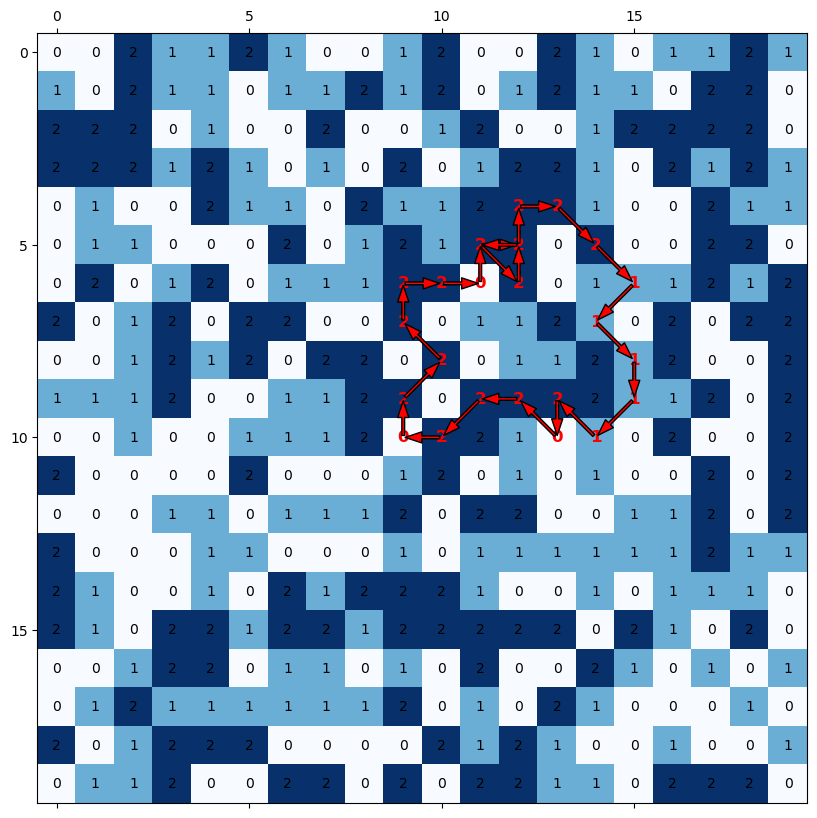

In [8]:
# Initialize input parameters
start = (10, 10)
end = (10, 10)
T = 25
regen_value = 0

# Initialize and run the genetic algorithm
ga_solver = GeneticAlgorithm(grid_20, start, end, T, regen_value)
best_path, best_value, running_time_ms = ga_solver.run_algorithm()

print("Best value:", best_value)
print("Elapsed time (in ms):", running_time_ms)
print("Best path:", best_path)

visualize_path(grid_20, best_path)

## Empirical analysis of time efficiency

In [10]:
# Initialize input parameters
start = (500, 500)
T = 25
regen_value = 1

# List to store the results
results_dp = []
results_ga = []

# Iterate over the starting points and collect running times
for start in starting_points_1000:
    # Performance DP
    dp_path_finder = DynamicProgramming(grid_1000, start, T, regen_value)
    max_value, path, dp, parent, elapsed_time = dp_path_finder.max_path_value_and_path()
    results_dp.append({'max_value': max_value, 'elapsed_time': elapsed_time})
    # Performance GA
    ga_path_finder = GeneticAlgorithm(grid_1000, start, start, T, regen_value)
    path, max_value, elapsed_time = ga_path_finder.run_algorithm()
    results_ga.append({'max_value': max_value, 'elapsed_time': elapsed_time})

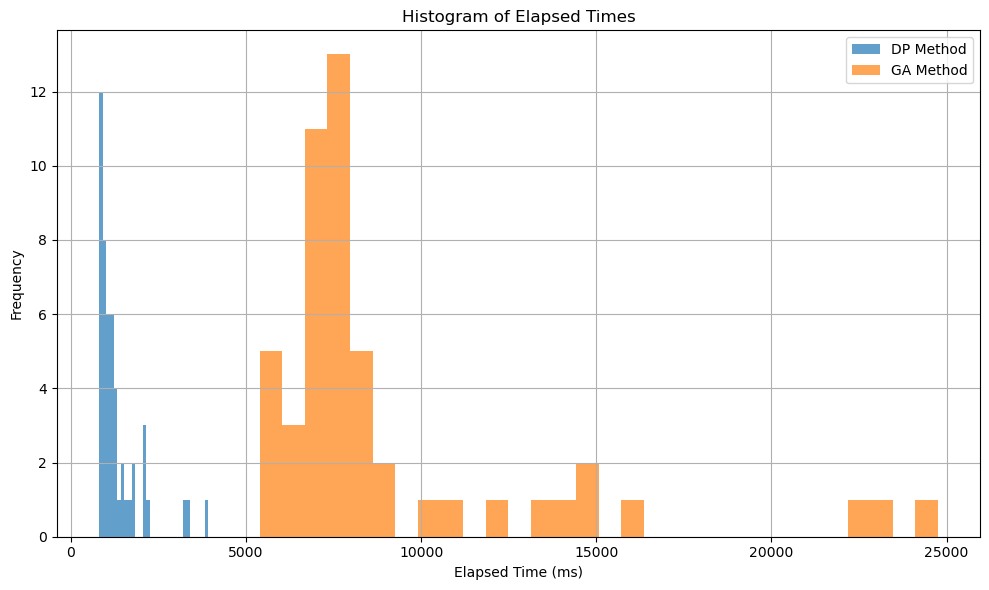

In [16]:
# Extract 'elapsed_time' values
elapsed_times_dp = [result['elapsed_time'] for result in results_dp]
elapsed_times_ga = [result['elapsed_time'] for result in results_ga]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(elapsed_times_dp, bins=30, alpha=0.7, label='DP Method') 
plt.hist(elapsed_times_ga, bins=30, alpha=0.7, label='GA Method') 
plt.xlabel('Elapsed Time (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Elapsed Times')
plt.legend()  # Add legend to the plot
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

**Analysis:**

- The dynamic programming algorithm is on average much faster than the GA
- The dynamic programming algorithm returns on average a better (i.e. higher value) path
- A possible explanation is that the parameters of the GA are not explored properly. Technically, the complexity for the GA increases linearly in T, while DP increases linearly in T^2 (depending on the grid size).